<img src="../img/hu-logo.png" align="right" width="120">

# Activation functions

This includes the following steps:
1. Sigmoid
1. TanH
1. Softplus
1. ReLU
1. Leaky ReLU
1. ELU
1. SELU

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams.update(
    {
        "figure.figsize": (10, 8),
        "axes.titlesize": 20,
        "axes.labelsize": 15,
        "legend.fontsize": 15,
        "axes.axisbelow": True,
        "pcolor.shading": "auto",
    }
)

In [3]:
def plot_activation(x, a, l):
    fig, ax1 = plt.subplots()
    plt.grid()
    plt.title(l)

    ax1.plot(x, a(x), c="darkblue", lw=3, label=l)
    ax1.set_xlabel("x")
    ax1.set_ylabel(f"{l}(x)", color="darkblue")
    ax1.tick_params(axis="y", labelcolor="darkblue")

    ax2 = ax1.twinx()
    ax2.plot(x, a.gradient(x), "--", c="darkred", lw=2, label="gradient")
    ax2.set_ylabel("gradient", color="darkred")
    ax2.tick_params(axis="y", labelcolor="darkred")

## Activation functions and gradients

### Data

In [4]:
x = np.arange(-5, 5, 0.005)

### Sigmoid

In [5]:
class Sigmoid:
    def __call__(self, x):
        return self._sigmoid(x)

    def gradient(self, x):
        return self._sigmoid(x) * (1 - self._sigmoid(x))

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

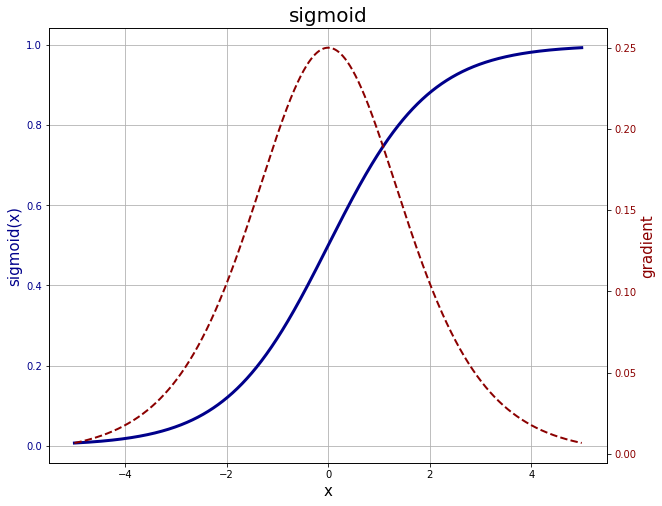

In [6]:
plot_activation(x, Sigmoid(), "sigmoid")

### Hyperbolic function

In [7]:
class TanH():
    def __call__(self, x):
        return self._tanh(x)

    def gradient(self, x):
        return 1 - self._tanh(x)**2

    def _tanh(self, x):
        return 2 / (1 + np.exp(-2 * x)) - 1

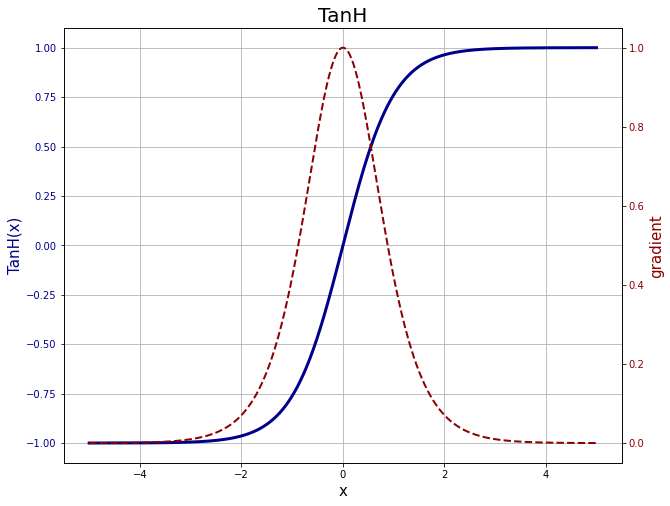

In [8]:
plot_activation(x, TanH(), "TanH")

### Softplus

In [9]:
class Softplus:
    def __call__(self, x):
        return np.log(1 + np.exp(x))

    def gradient(self, x):
        return 1 / (1 + np.exp(-x))

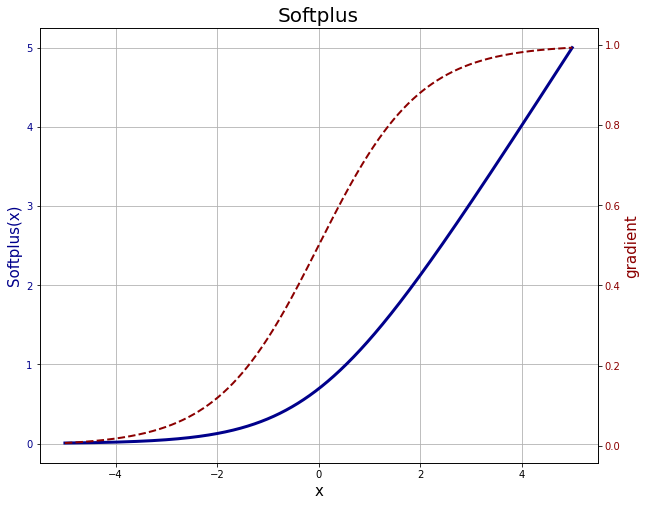

In [10]:
plot_activation(x, Softplus(), "Softplus")

## Rectified Linear Unit

In [11]:
class ReLU:
    def __call__(self, x):
        return (x >= 0) * x

    def gradient(self, x):
        return (x >= 0).astype(int)

In [12]:
# gradient at 0 set to 0 by definition

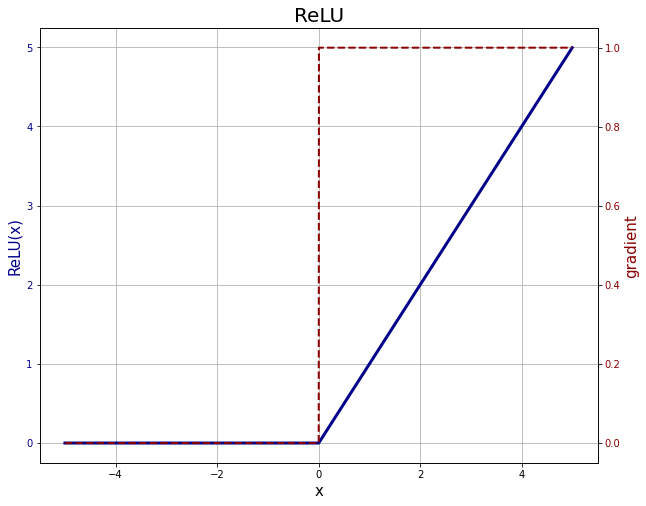

In [13]:
plot_activation(x, ReLU(), "ReLU")

## Leaky Rectified Linear Unit

In [14]:
class LeakyReLU():
    def __init__(self, alpha=0.2):
        self.alpha = alpha

    def __call__(self, x):
        return np.where(x >= 0, x, self.alpha * x)

    def gradient(self, x):
        return np.where(x >= 0, 1, self.alpha)

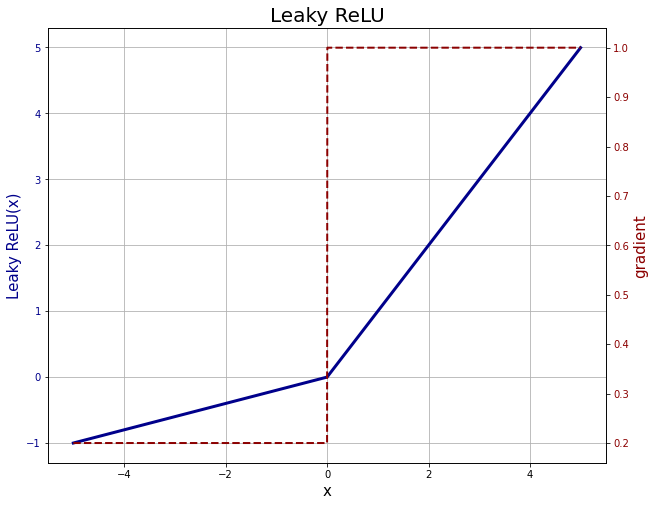

In [15]:
plot_activation(x, LeakyReLU(), "Leaky ReLU")

## Exponential linear unit

In [16]:
class ELU():
    def __init__(self, alpha=1):
        self.alpha = alpha 

    def __call__(self, x):
        return np.where(x >= 0.0, x, self.alpha * np.exp(x) - self.alpha)

    def gradient(self, x):
        return np.where(x >= 0.0, 1, self.alpha * np.exp(x))

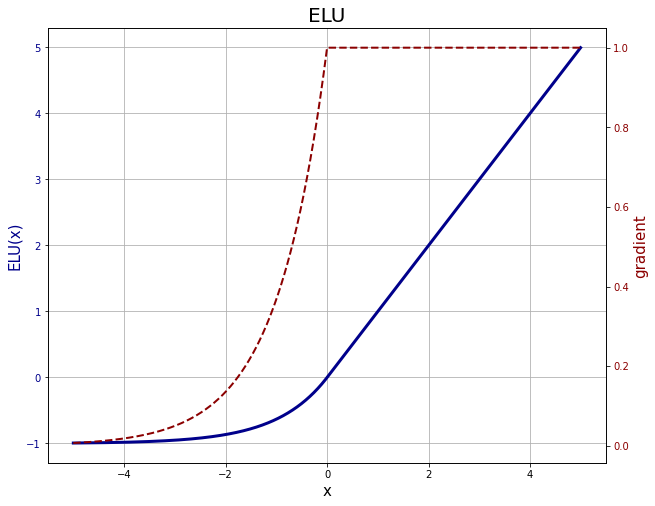

In [17]:
plot_activation(x, ELU(), "ELU")

## Scaled Exponential Linear Units

https://arxiv.org/abs/1706.02515

In [18]:
class SELU():
    def __init__(self):
        self._lambda = 1.050701
        self._alpha = 1.6732632

    def __call__(self, x):
        return self._lambda * np.where(x >= 0.0, x, self._alpha * np.exp(x) - self._alpha)

    def gradient(self, x):
        return self._lambda * np.where(x >= 0.0, 1, self._alpha * np.exp(x))

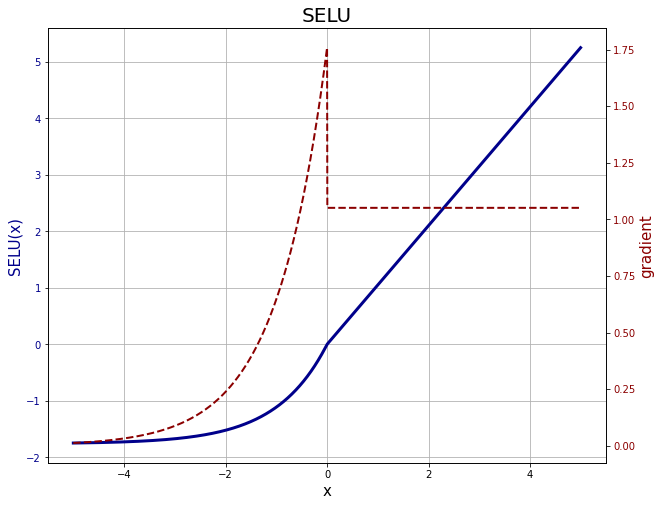

In [19]:
plot_activation(x, SELU(), "SELU")

## All

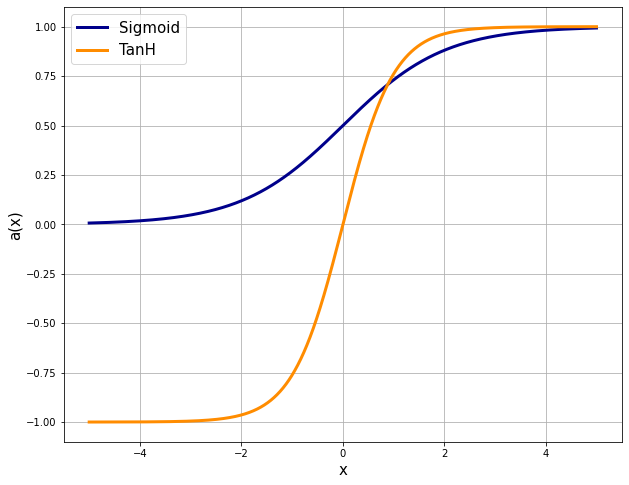

In [20]:
plt.plot(x, Sigmoid()(x), c="darkblue", lw=3, label="Sigmoid")
plt.plot(x, TanH()(x), c="darkorange", lw=3, label="TanH")
plt.grid()
plt.xlabel("x")
plt.ylabel("a(x)")
plt.legend()
plt.show()

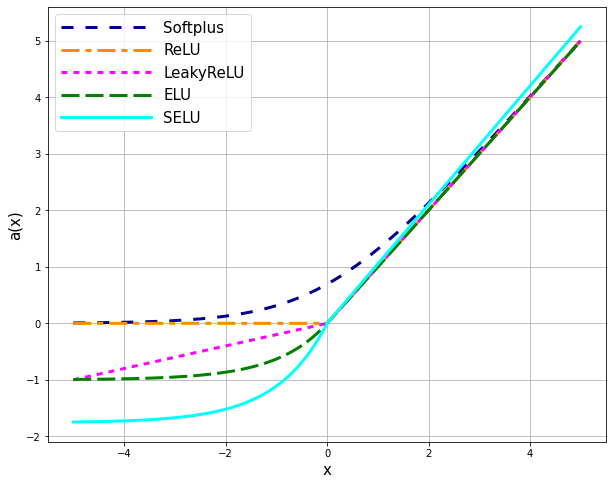

In [21]:
plt.plot(x, Softplus()(x), dashes=[4, 4], c="darkblue", lw=3, label="Softplus")
plt.plot(x, ReLU()(x), dashes=[6, 2, 2, 2], c="darkorange", lw=3, label="ReLU")
plt.plot(x, LeakyReLU()(x), dashes=[2, 2], c="magenta", lw=3, label="LeakyReLU")
plt.plot(x, ELU()(x), dashes=[6, 2, 6, 2], c="green", lw=3, label="ELU")
plt.plot(x, SELU()(x), c="cyan", lw=3, label="SELU")
plt.grid()
plt.xlabel("x")
plt.ylabel("a(x)")
plt.legend(handlelength=6)
plt.show()

<br>
<br>
&mdash; <br>
Dr. Sebastian Gabel <br>
Machine Learning in Marketing &ndash; Lecture 8 <br>
2021